In [3]:
import numpy as np
import pandas as pd

In [4]:
df= pd.read_csv(r"C:\Users\garud\Downloads\Telecom_Customer_Churn_Dataset.csv")

In [5]:
df.head()

,CustomerID,Tenure_Months,Monthly_Charges,Total_Charges,Contract_Type,Internet_Service,Payment_Method,Churn
0,CUST00001,52,1541.42,75408.44,Two Year,No,UPI,No
1,CUST00002,15,1317.97,73419.49,Month-to-Month,DSL,Bank Transfer,No
2,CUST00003,61,409.64,87681.15,Month-to-Month,No,Credit Card,No
3,CUST00004,21,1791.31,72417.07,Two Year,DSL,Bank Transfer,No
4,CUST00005,24,1791.34,23568.21,One Year,Fiber Optic,Debit Card,No


REMOVING ALL DUPLICATES AND NULL VALUES

In [6]:
df = df.drop_duplicates()

In [7]:
df= df.dropna()

FEATURE SCALLING

In [8]:
a = df.select_dtypes(include= np.number)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
a = StandardScaler().fit_transform(a)

In [11]:
a

array([[ 0.82485273,  0.79505695,  0.89158184],
       [-0.98219266,  0.33916224,  0.82204727],
       [ 1.26440431, -1.51406145,  1.32064121],
       ...,
       [-1.03103172,  0.04146882,  0.17340382],
       [ 0.87369179, -0.76175868,  0.25371005],
       [ 1.16672618,  1.11409143, -0.53349806]], shape=(2500, 3))

In [12]:
b=pd.DataFrame(a,columns=['Tenure_Months',"Monthly_Charges","Total_charges"])

In [13]:
b

,Tenure_Months,Monthly_Charges,Total_charges
0,0.824853,0.795057,0.891582
1,-0.982193,0.339162,0.822047
2,1.264404,-1.514061,1.320641
3,-0.689158,1.304896,0.787002
4,-0.542641,1.304957,-0.920776
...,...,...,...
2495,-0.103089,-1.372162,-0.839583
2496,0.824853,0.183144,1.258993
2497,-1.031032,0.041469,0.173404
2498,0.873692,-0.761759,0.253710


ENCODING

In [14]:
c=df.select_dtypes(include=['object'])

In [15]:
c

,CustomerID,Contract_Type,Internet_Service,Payment_Method,Churn
0,CUST00001,Two Year,No,UPI,No
1,CUST00002,Month-to-Month,DSL,Bank Transfer,No
2,CUST00003,Month-to-Month,No,Credit Card,No
3,CUST00004,Two Year,DSL,Bank Transfer,No
4,CUST00005,One Year,Fiber Optic,Debit Card,No
...,...,...,...,...,...
2495,CUST02496,Month-to-Month,No,Debit Card,No
2496,CUST02497,Two Year,No,Credit Card,No
2497,CUST02498,Month-to-Month,No,Credit Card,Yes
2498,CUST02499,One Year,Fiber Optic,UPI,No


In [16]:
d = c.drop("CustomerID",axis=1)

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
for i in d:
    d[i]=LabelEncoder().fit_transform(d[i])

In [19]:
d.head()

,Contract_Type,Internet_Service,Payment_Method,Churn
0,2,2,3,0
1,0,0,0,0
2,0,2,1,0
3,2,0,0,0
4,1,1,2,0


COMBINING THE NUMERICAL COLUMNS AND CATEGORICAL COLUMNS

In [20]:
df1= pd.concat([b,d],axis=1)

In [21]:
df1.head()

,Tenure_Months,Monthly_Charges,Total_charges,Contract_Type,Internet_Service,Payment_Method,Churn
0,0.824853,0.795057,0.891582,2,2,3,0
1,-0.982193,0.339162,0.822047,0,0,0,0
2,1.264404,-1.514061,1.320641,0,2,1,0
3,-0.689158,1.304896,0.787002,2,0,0,0
4,-0.542641,1.304957,-0.920776,1,1,2,0


# defining the target and feature


In [22]:
X = df1.drop("Churn", axis=1)
y = df1["Churn"]

In [23]:
X.head()

,Tenure_Months,Monthly_Charges,Total_charges,Contract_Type,Internet_Service,Payment_Method
0,0.824853,0.795057,0.891582,2,2,3
1,-0.982193,0.339162,0.822047,0,0,0
2,1.264404,-1.514061,1.320641,0,2,1
3,-0.689158,1.304896,0.787002,2,0,0
4,-0.542641,1.304957,-0.920776,1,1,2


TRAIN TEST SPLIT

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

MODEL DEPLOYMENT

In [27]:

from sklearn.linear_model import LogisticRegression

In [29]:
# Train
model = LogisticRegression()
model.fit(X_train, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

PREDICTED VALUES

In [30]:
y_pred=model.predict(X_test)


METRICES

In [31]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [32]:
accuracy_score(y_test,y_pred)

0.734

In [33]:
import warnings
warnings.filterwarnings("ignore")
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85       367
           1       0.00      0.00      0.00       133

    accuracy                           0.73       500
   macro avg       0.37      0.50      0.42       500
weighted avg       0.54      0.73      0.62       500



In [35]:
confusion_matrix(y_test,y_pred)

array([[367,   0],
       [133,   0]])

In [36]:
accuracy =367/500

In [37]:
accuracy

0.734

FINAL INSIGHT

In [38]:
model.coef_[0]

array([ 0.00449681, -0.03594165, -0.06658532, -0.04899694,  0.0731016 ,
       -0.1483962 ])

In [39]:
X.columns

Index(['Tenure_Months', 'Monthly_Charges', 'Total_charges', 'Contract_Type',
       'Internet_Service', 'Payment_Method'],
      dtype='object')

In [71]:
import matplotlib.pyplot as plt

<BarContainer object of 6 artists>

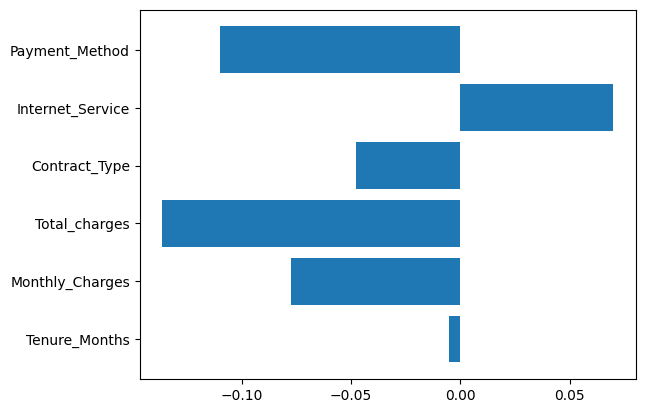

In [72]:
plt.barh(X.columns,model.coef_[0])

##the main reasion behind customer churn was the internet service